# IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random



In [3]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test,y_test= test['features'],test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

#  IMAGE EXPLORATION

7

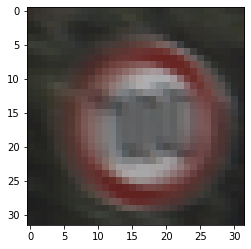

In [7]:

i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
y_train[i]

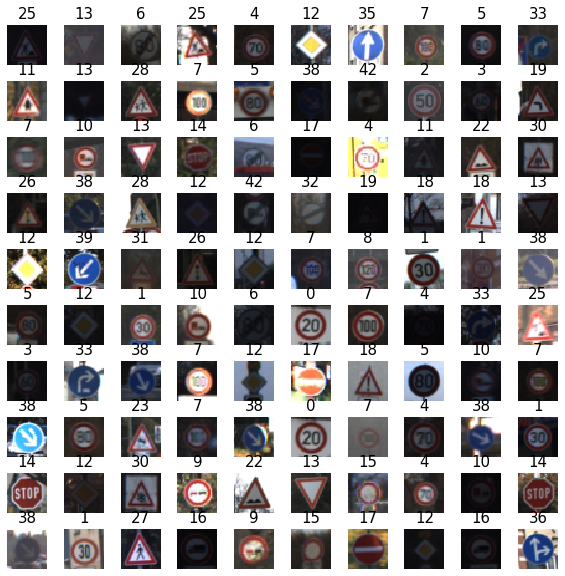

In [8]:
# more images in a grid format
# the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
#  evenly spaces variables
for i in np.arange(0,W_grid * L_grid):

# Select a random number
    index=np.random.randint(0,n_training)
    

# read and display an image with the selected index

    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=15)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

# DATA PEPARATION

In [9]:
# Shuffle the dataset 
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [10]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [11]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

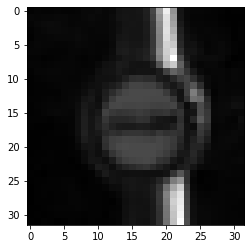

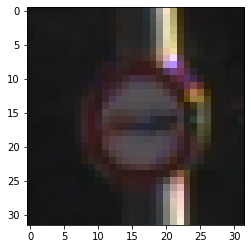

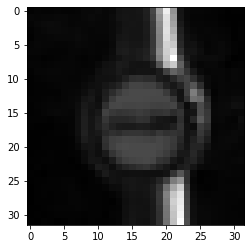

In [12]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

In [13]:

# BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
from tensorflow.keras import datasets, layers, models
CNN =models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Dropout(0.2))

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
____

# COMPILE AND TRAIN DEEP CNN MODEL


In [15]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size = 500,
                  epochs = 50,
                  verbose = 1,
                  validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 18s 527us/sample - loss: 3.1922 - acc: 0.1690 - val_loss: 2.5866 - val_acc: 0.2968
Epoch 2/50
34799/34799 [==============================] - 16s 462us/sample - loss: 1.6574 - acc: 0.5314 - val_loss: 1.1887 - val_acc: 0.6438
Epoch 3/50
34799/34799 [==============================] - 17s 481us/sample - loss: 0.9568 - acc: 0.7169 - val_loss: 0.8167 - val_acc: 0.7444
Epoch 4/50
34799/34799 [==============================] - 16s 448us/sample - loss: 0.7122 - acc: 0.7924 - val_loss: 0.7154 - val_acc: 0.7825
Epoch 5/50
34799/34799 [==============================] - 15s 424us/sample - loss: 0.5795 - acc: 0.8336 - val_loss: 0.5999 - val_acc: 0.8211
Epoch 6/50
34799/34799 [==============================] - 17s 483us/sample - loss: 0.4798 - acc: 0.8643 - val_loss: 0.5313 - val_acc: 0.8494
Epoch 7/50
34799/34799 [==============================] - 18s 506us/sample - loss: 0.4228 - acc: 0.8806 -

In [ ]:
#ASSESS TRAINED CNN MODEL PERFORMANCE


In [35]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

In [36]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 13s 363us/step - loss: 3.2118 - acc: 0.1636 - val_loss: 2.8450 - val_acc: 0.2673
Epoch 2/50
34799/34799 [==============================] - 12s 349us/step - loss: 1.8128 - acc: 0.4974 - val_loss: 1.5689 - val_acc: 0.5392
Epoch 3/50
34799/34799 [==============================] - 12s 346us/step - loss: 1.0545 - acc: 0.6960 - val_loss: 1.1063 - val_acc: 0.6696
Epoch 4/50
34799/34799 [==============================] - 12s 348us/step - loss: 0.7642 - acc: 0.7811 - val_loss: 1.0389 - val_acc: 0.6703
Epoch 5/50
34799/34799 [==============================] - 12s 341us/step - loss: 0.6054 - acc: 0.8291 - val_loss: 0.8435 - val_acc: 0.7492
Epoch 6/50
34799/34799 [==============================] - 12s 349us/step - loss: 0.4885 - acc: 0.8655 - val_loss: 0.7833 - val_acc: 0.7723
Epoch 7/50
34799/34799 [==============================] - 13s 367us/step - loss: 0.4119 - acc: 0.8896 - val_loss: 0.7

In [22]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 3s 231us/sample - loss: 0.5066 - acc: 0.9249
Test Accuracy: 0.9249406456947327


In [26]:
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Traning and Validation accuracy')

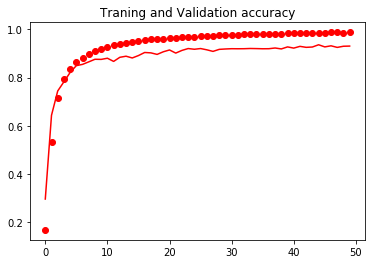

In [31]:
epochs = range(len(acc))
plt.plot(epochs,acc,'ro',label = 'Traning accuarcy')
plt.plot(epochs,val_acc,'r',label = 'Validation acc')
plt.title('Traning and Validation accuracy')

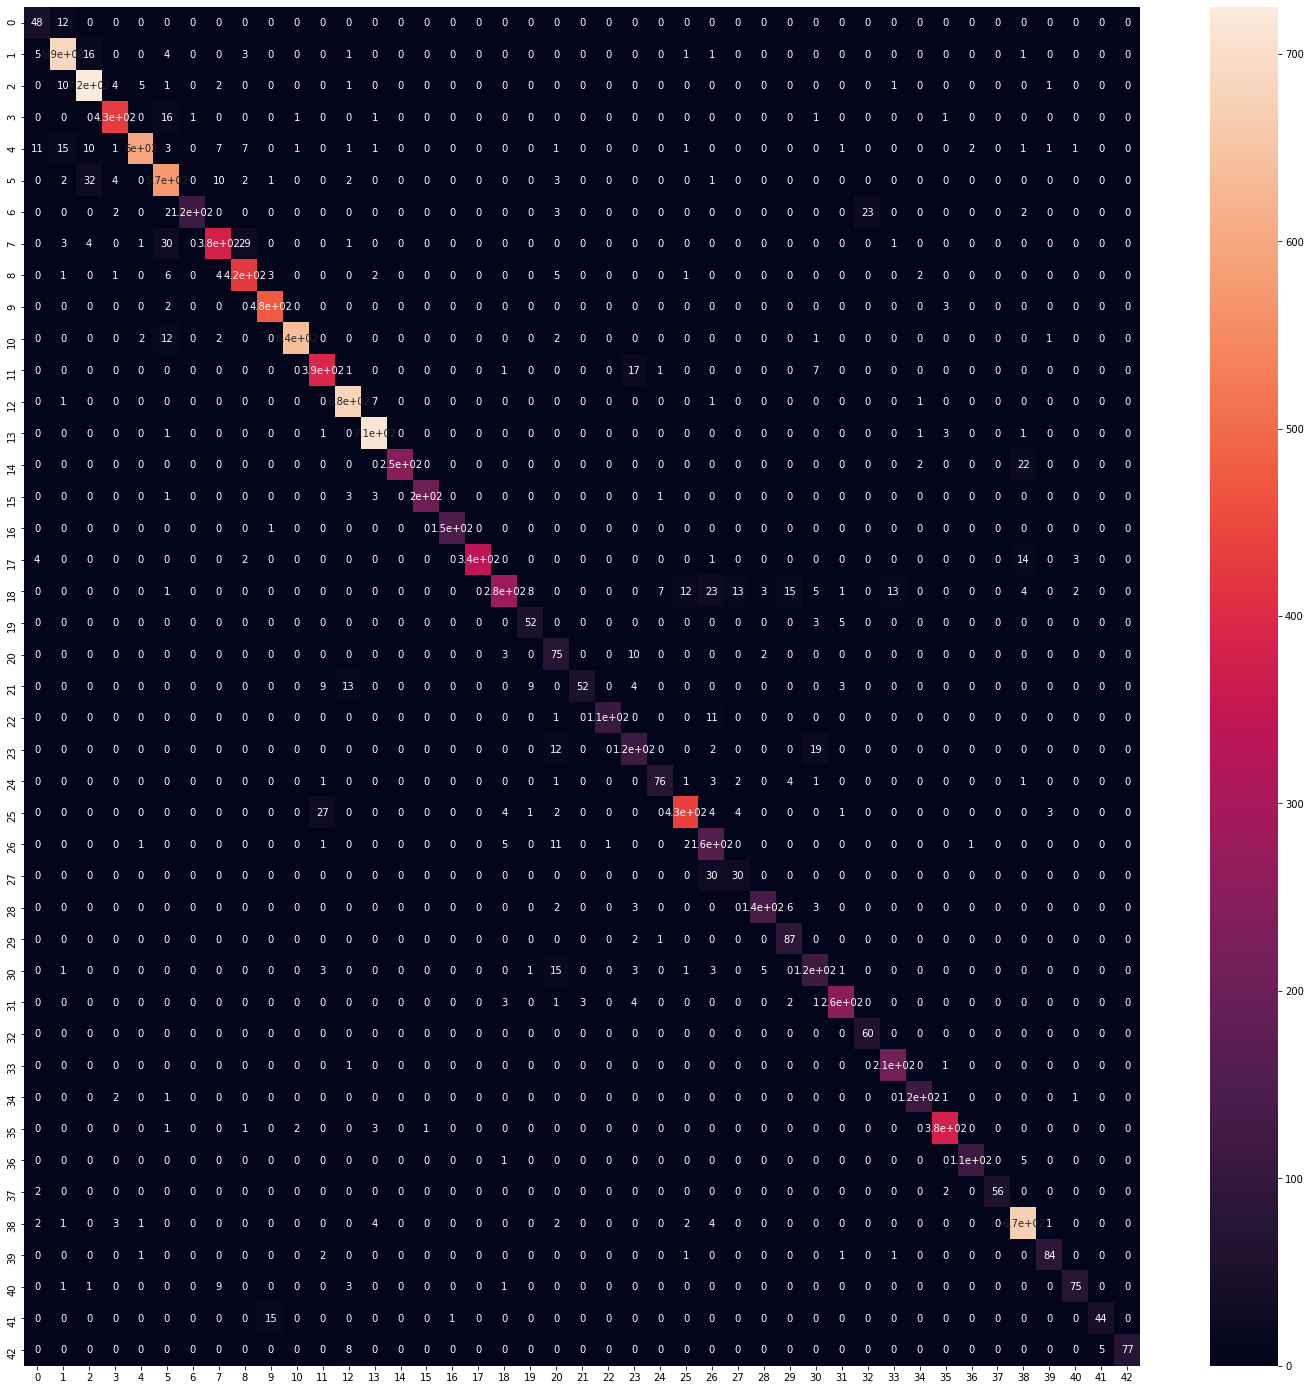

In [32]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

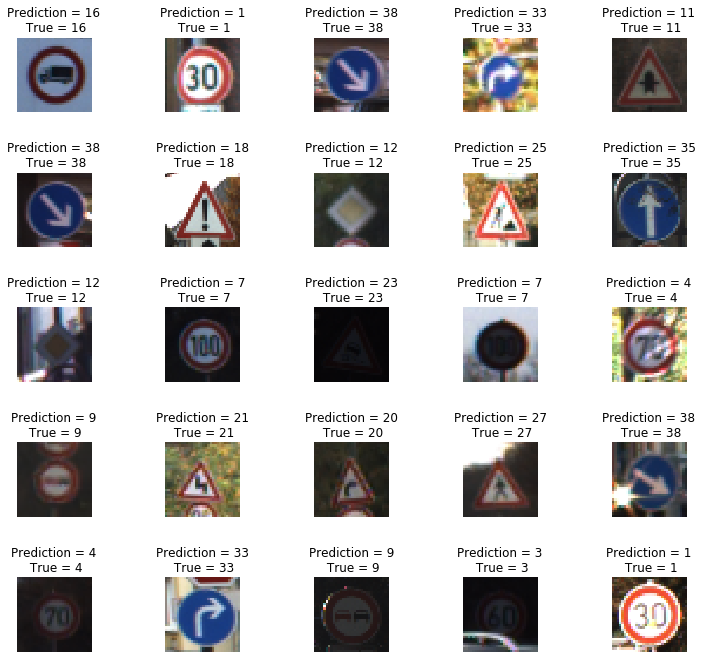

In [33]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [ ]:
#APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
